In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
articles = pd.read_csv('articles.csv')
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
customers = pd.read_csv('customers.csv')
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
transactions = pd.read_csv('transactions_train.csv')
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [5]:
df = transactions.groupby(['article_id'])['price'].sum().reset_index()

In [21]:
df = df.sort_values('price', ascending=False).reset_index()

In [22]:
df

,index,article_id,price,normalised_price,cumulative_price
0,53832,706016001,1631.732102,1.844503e-03,0.001845
1,53833,706016002,1136.321085,1.284492e-03,0.003129
2,15980,568601006,939.268593,1.061745e-03,0.004191
3,3087,448509014,781.478390,8.833798e-04,0.005074
4,53834,706016003,692.195915,7.824553e-04,0.005857
...,...,...,...,...,...
104542,2432,407663007,0.000678,7.663700e-10,1.000000
104543,8151,520431003,0.000678,7.663700e-10,1.000000
104544,2367,405310006,0.000475,5.364590e-10,1.000000
104545,16158,569052001,0.000441,4.981405e-10,1.000000


In [23]:
s = sum(df['price'])

In [24]:
df['normalised_price'] = df['price']/s

In [25]:
df

,index,article_id,price,normalised_price,cumulative_price
0,53832,706016001,1631.732102,1.844503e-03,0.001845
1,53833,706016002,1136.321085,1.284492e-03,0.003129
2,15980,568601006,939.268593,1.061745e-03,0.004191
3,3087,448509014,781.478390,8.833798e-04,0.005074
4,53834,706016003,692.195915,7.824553e-04,0.005857
...,...,...,...,...,...
104542,2432,407663007,0.000678,7.663700e-10,1.000000
104543,8151,520431003,0.000678,7.663700e-10,1.000000
104544,2367,405310006,0.000475,5.364590e-10,1.000000
104545,16158,569052001,0.000441,4.981405e-10,1.000000


In [26]:
df['cumulative_price'] = df['normalised_price'].cumsum()

In [36]:
items=[]
for i in range (1, len(df)+1):
    items.append(i)

In [37]:
items[0:5]

[1, 2, 3, 4, 5]

In [38]:
df['item_id'] = items

In [39]:
new_df = df[['item_id', 'cumulative_price']]

In [40]:
new_df

,item_id,cumulative_price
0,1,0.001845
1,2,0.003129
2,3,0.004191
3,4,0.005074
4,5,0.005857
...,...,...
104542,104543,1.000000
104543,104544,1.000000
104544,104545,1.000000
104545,104546,1.000000


In [61]:
df_1 = new_df[:twenty_percent]

In [62]:
df_1

,item_id,cumulative_price
0,1,0.001845
1,2,0.003129
2,3,0.004191
3,4,0.005074
4,5,0.005857
...,...,...
20904,20905,0.805987
20905,20906,0.806000
20906,20907,0.806012
20907,20908,0.806025


In [63]:
df_2 = new_df[twenty_percent:sixty_percent]

In [64]:
df_2

,item_id,cumulative_price
20909,20910,0.806050
20910,20911,0.806062
20911,20912,0.806074
20912,20913,0.806087
20913,20914,0.806099
...,...,...
62597,62598,0.988788
62598,62599,0.988789
62599,62600,0.988790
62600,62601,0.988791


In [65]:
df_3 = new_df[sixty_percent:]

In [66]:
df_3

,item_id,cumulative_price
62602,62603,0.988792
62603,62604,0.988793
62604,62605,0.988794
62605,62606,0.988795
62606,62607,0.988796
...,...,...
104542,104543,1.000000
104543,104544,1.000000
104544,104545,1.000000
104545,104546,1.000000


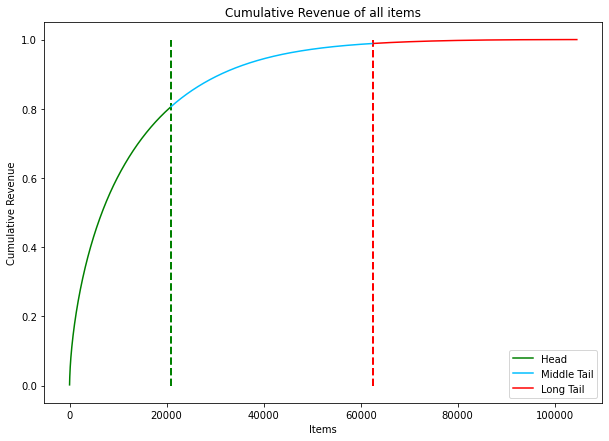

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
plt.plot(df_1['item_id'], df_1['cumulative_price'], color = 'green', label='Head')
plt.plot(df_2['item_id'], df_2['cumulative_price'], color = 'deepskyblue', label='Middle Tail')
plt.plot(df_3['item_id'], df_3['cumulative_price'], color = 'red', label='Long Tail')
plt.vlines(x=[twenty_percent], ymin=0, ymax=1, colors='green', ls='--', lw=2)
plt.vlines(x=[sixty_percent], ymin=0, ymax=1, colors='red', ls='--', lw=2)
plt.xlabel('Items')
plt.ylabel('Cumulative Revenue')
plt.legend(loc='lower right')
plt.title('Cumulative Revenue of all items')
plt.show()

In [52]:
twenty_percent = len(new_df)//5

In [54]:
sixty_percent = int(len(new_df)//1.67)

In [41]:
trans_df = transactions[['t_dat', 'customer_id', 'article_id', 'price']]

In [42]:
article_df = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'department_name', 
                       'index_group_name', 'section_name', 'garment_group_name', 'perceived_colour_value_name']]

In [43]:
merged_df = pd.merge(trans_df, article_df, on='article_id')
merged_df.head()

,t_dat,customer_id,article_id,price,prod_name,product_type_name,product_group_name,department_name,index_group_name,section_name,garment_group_name,perceived_colour_value_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Dark
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Dark
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Dark
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Dark
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,Atlanta Push Body Harlow,Underwear body,Underwear,Expressive Lingerie,Ladieswear,Womens Lingerie,"Under-, Nightwear",Dark


In [ ]:
cust_df = customers[['customer_id', 'age']]

In [ ]:
fin_merged_df = pd.merge(merged_df, cust_df, on='customer_id')
fin_merged_df.head()

In [ ]:
ign = fin_merged_df['index_group_name'].unique().tolist()

In [ ]:
ign

In [ ]:
cols = ['Darkgreen', 'DarkMagenta', 'crimson', 'Coral', 'Deepskyblue']

In [ ]:
import matplotlib.dates as mdates

df = fin_merged_df.groupby(['t_dat', 'index_group_name'])['article_id'].count().reset_index()
df.columns = ['Date', 'Index Group Name', 'Transactions']

for i in ign:

    fig, ax = plt.subplots(1, 1, figsize=(20,6))
    g1 = ax.plot(df.loc[df['Index Group Name']==i, 'Date'], df.loc[df['Index Group Name']==i, 'Transactions'], 
                 label=i, color=cols[ign.index(i)])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))
    plt.xlabel('Date')
    plt.ylabel('Transactions')
    ax.legend()
    plt.title('Transactions per day')
    plt.gcf().autofmt_xdate()
    plt.show()

In [ ]:
pcvn = fin_merged_df['perceived_colour_value_name'].unique().tolist()

In [ ]:
pcvn

In [ ]:
cols = ['Darkgreen', 'DarkMagenta', 'yellowgreen', 'Coral', 'Deepskyblue', 'chocolate', 'darkorchid', 'crimson']

In [ ]:
df = fin_merged_df.groupby(['t_dat', 'perceived_colour_value_name'])['article_id'].count().reset_index()
df.columns = ['Date', 'Colour', 'Transactions']

for i in pcvn:

    fig, ax = plt.subplots(1, 1, figsize=(20,6))
    g1 = ax.plot(df.loc[df['Colour']==i, 'Date'], df.loc[df['Colour']==i, 'Transactions'], 
                 label=i, color=cols[pcvn.index(i)])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))
    plt.xlabel('Date')
    plt.ylabel('Transactions')
    ax.legend()
    plt.title('Transactions per day')
    plt.gcf().autofmt_xdate()
    plt.show()

In [44]:
ggn = merged_df['garment_group_name'].unique().tolist()

In [45]:
ggn

['Under-, Nightwear',
 'Knitwear',
 'Special Offers',
 'Blouses',
 'Trousers',
 'Jersey Basic',
 'Skirts',
 'Jersey Fancy',
 'Accessories',
 'Trousers Denim',
 'Socks and Tights',
 'Woven/Jersey/Knitted mix Baby',
 'Unknown',
 'Dresses Ladies',
 'Outdoor',
 'Shoes',
 'Dressed',
 'Swimwear',
 'Shirts',
 'Shorts',
 'Dresses/Skirts girls']

In [51]:
cols = ['Darkgreen', 'DarkMagenta', 'yellowgreen', 'Coral', 'Deepskyblue', 'chocolate', 'darkorchid', 
        'crimson', 'grey', 'deeppink', 'goldenrod', 'mediumturquoise', 'lime', 'salmon',
       'purple', 'olive', 'slateblue', 'mediumaquamarine', 'mediumvioletred', 'cornflowerblue', 'darkblue']

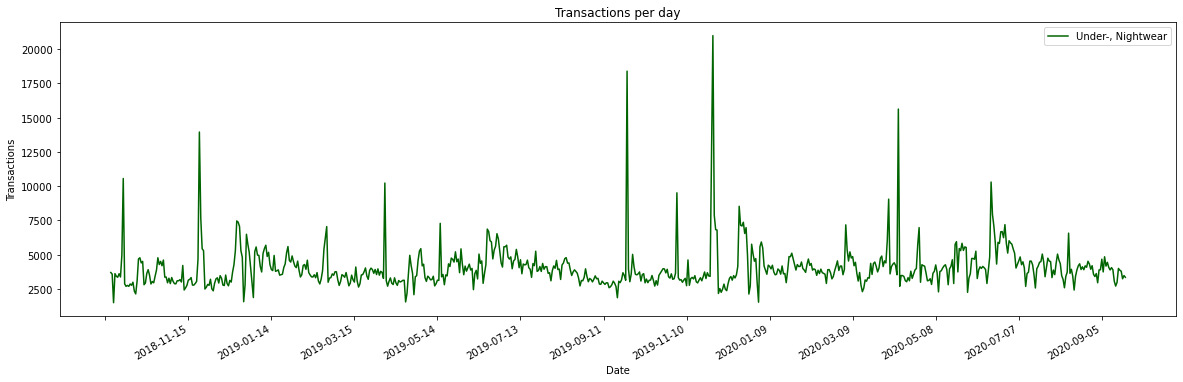

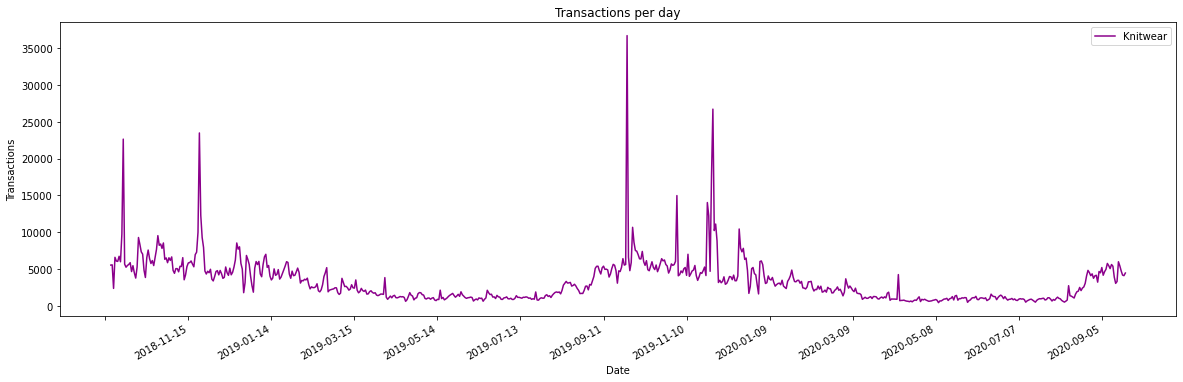

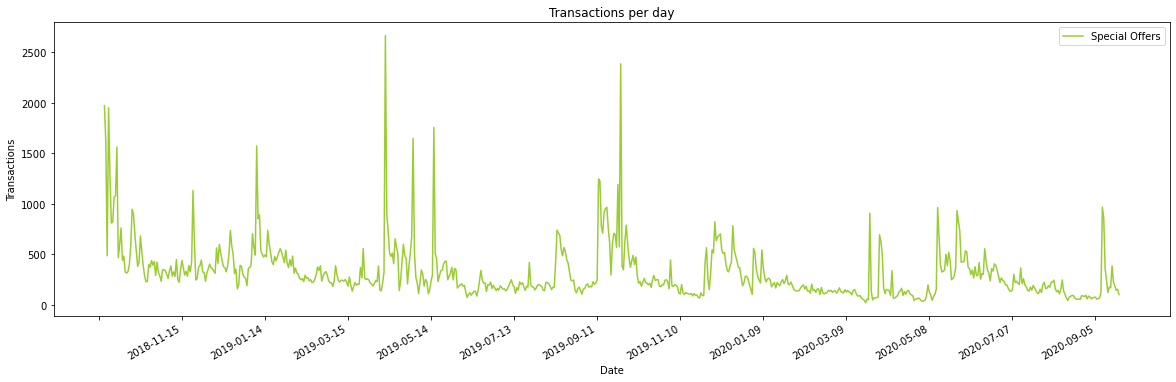

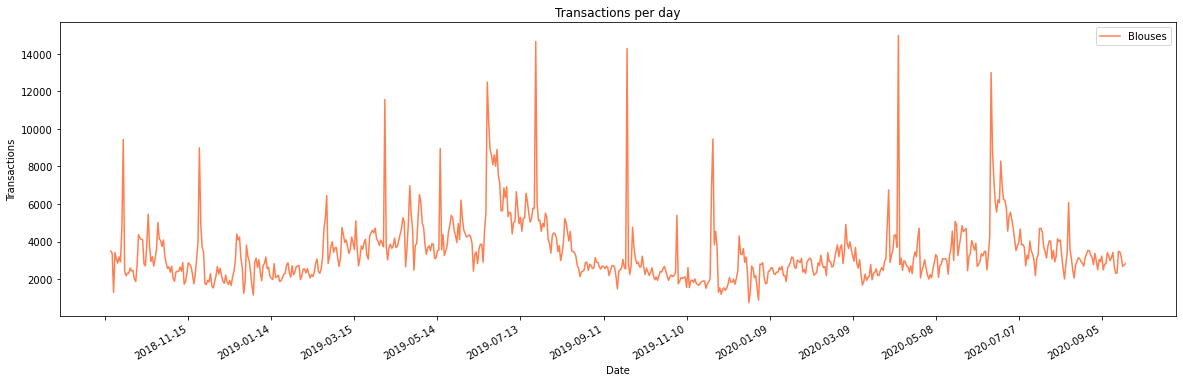

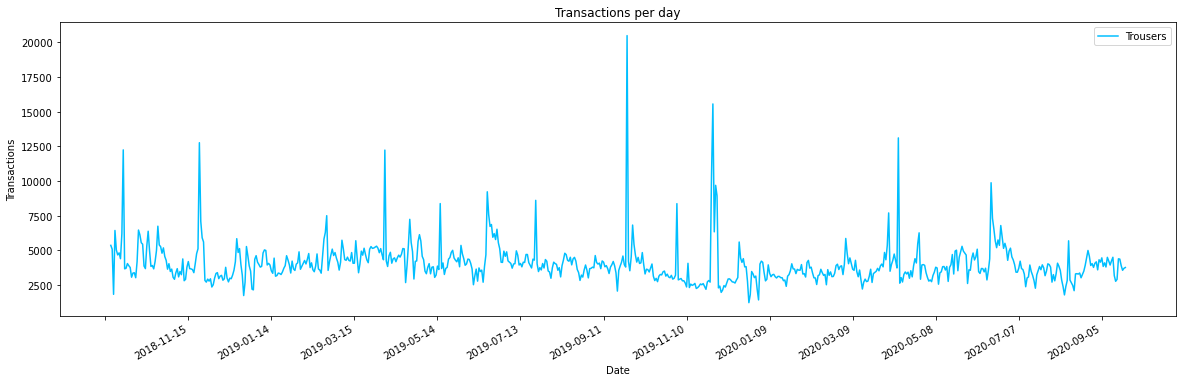

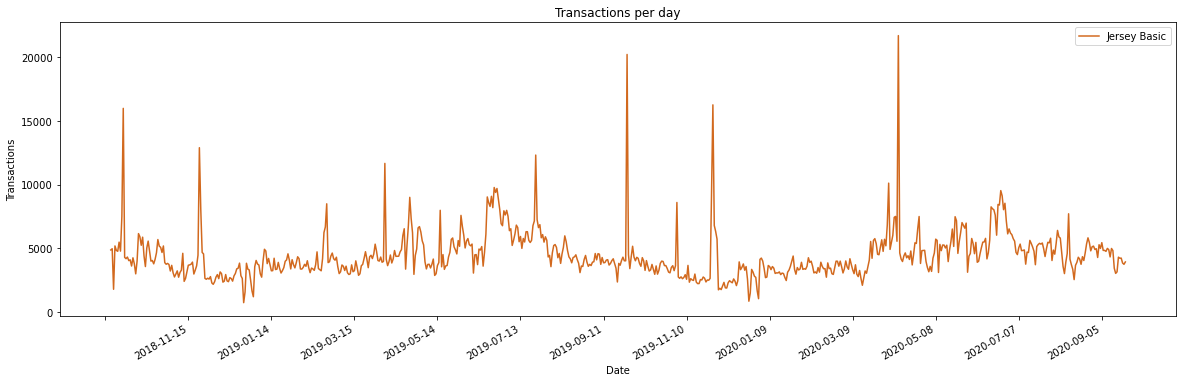

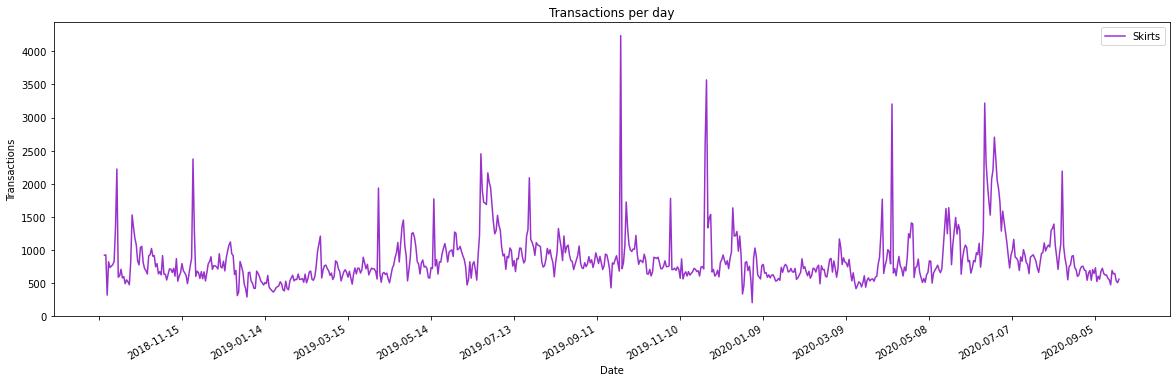

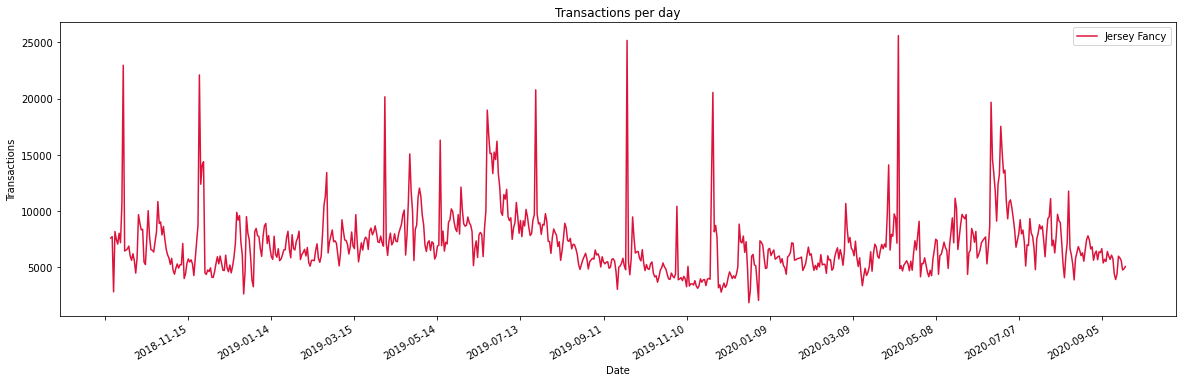

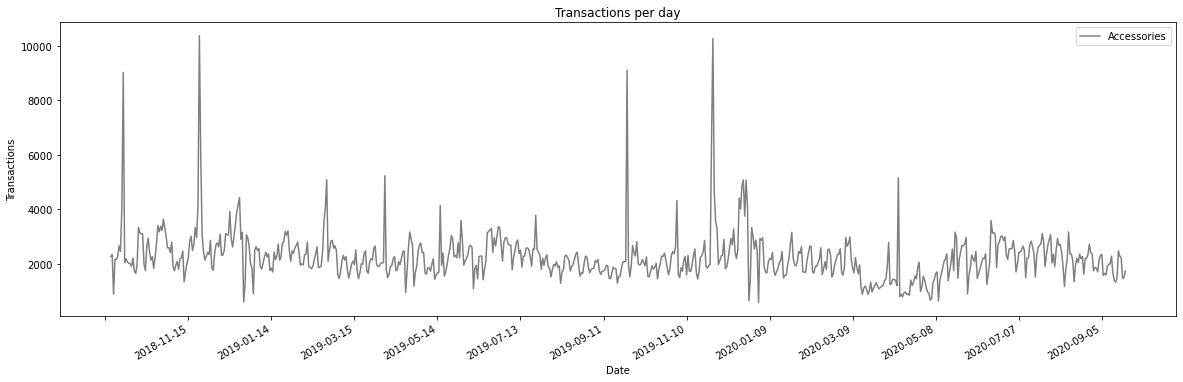

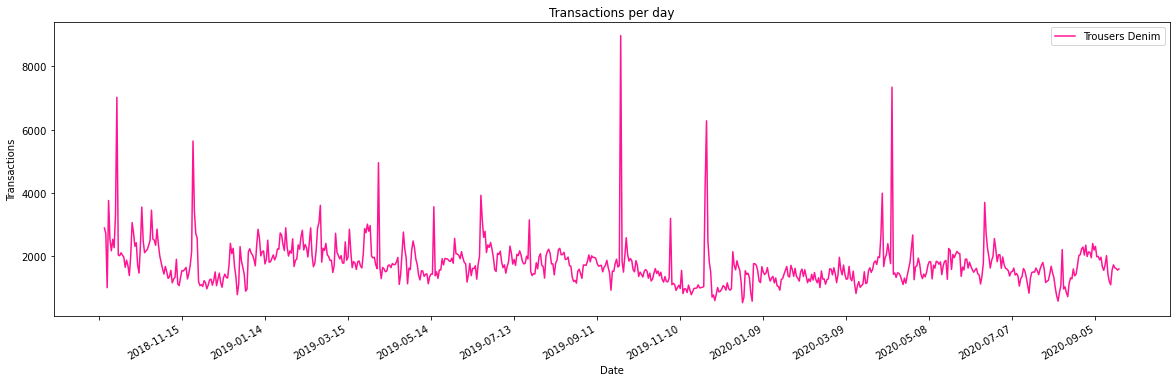

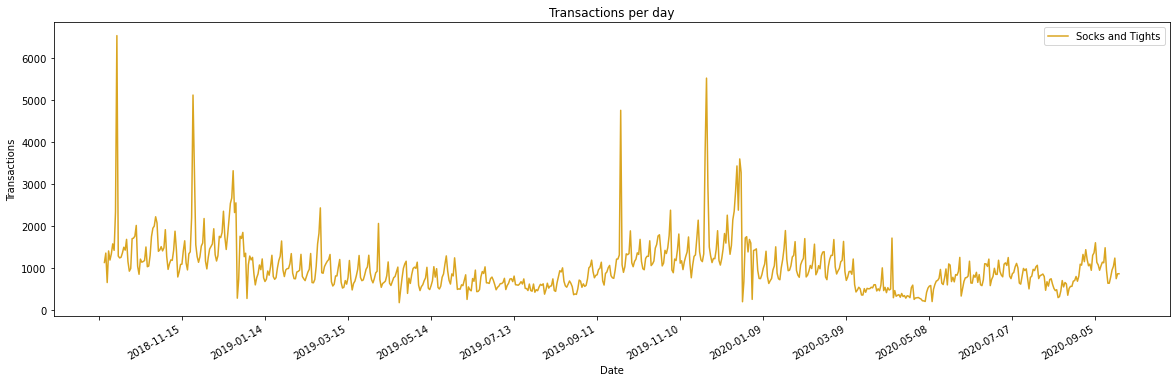

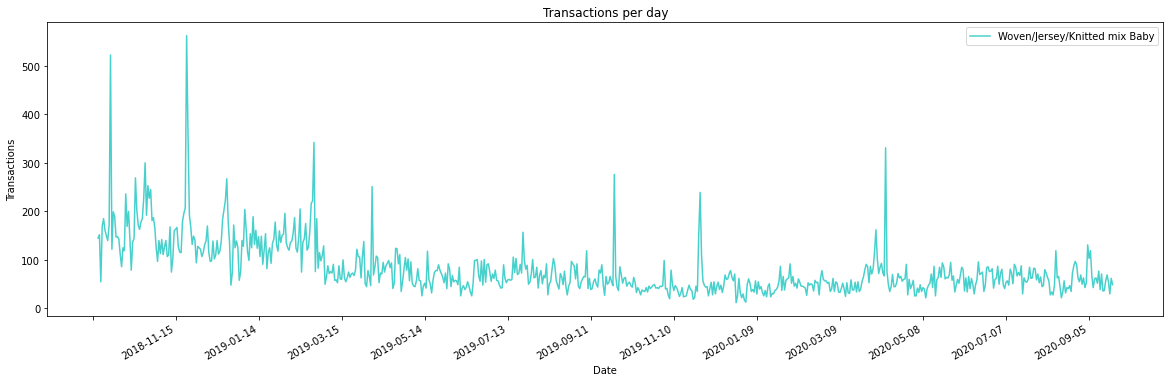

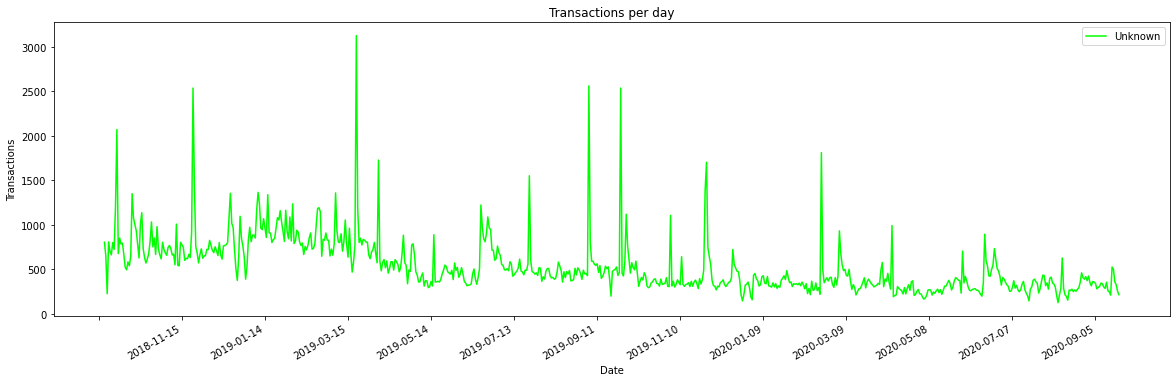

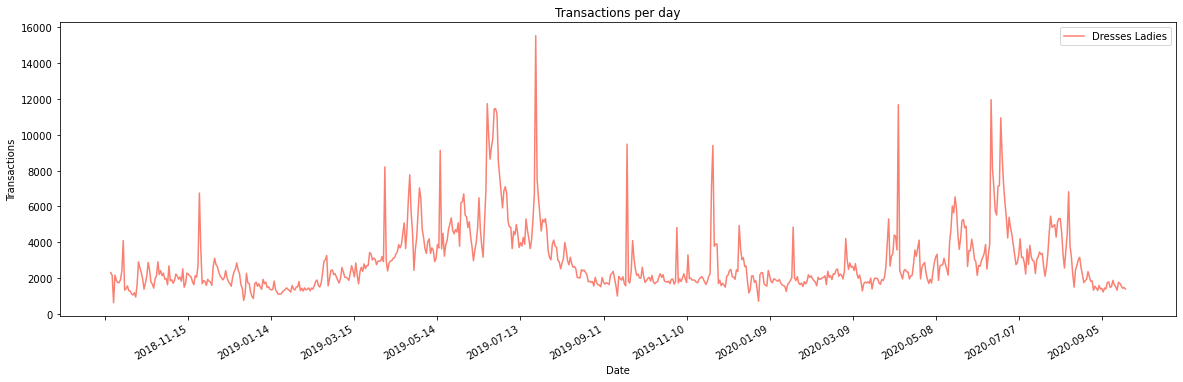

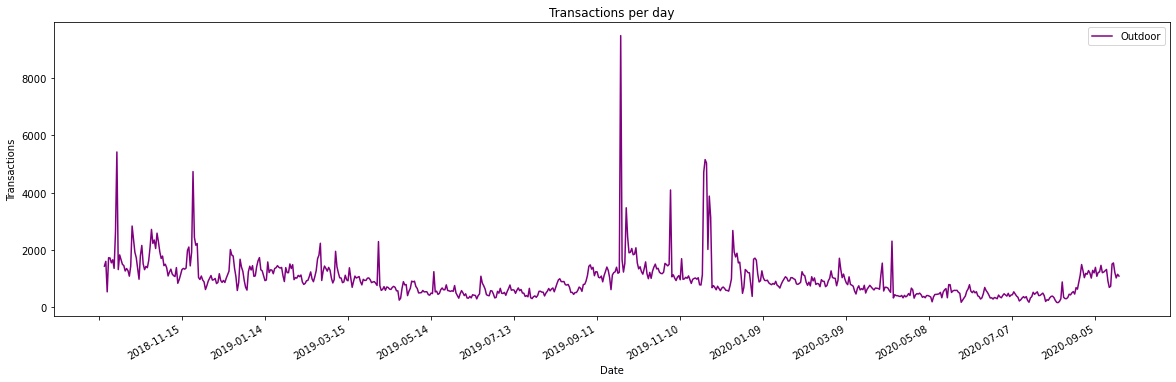

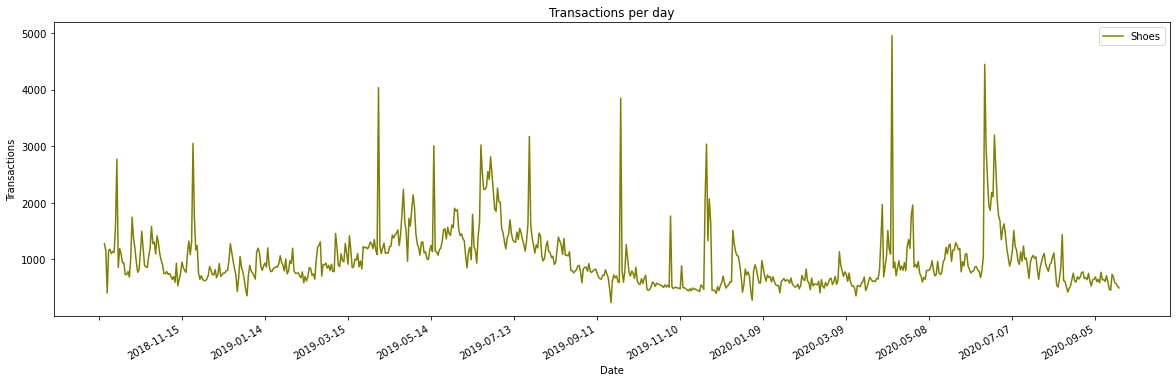

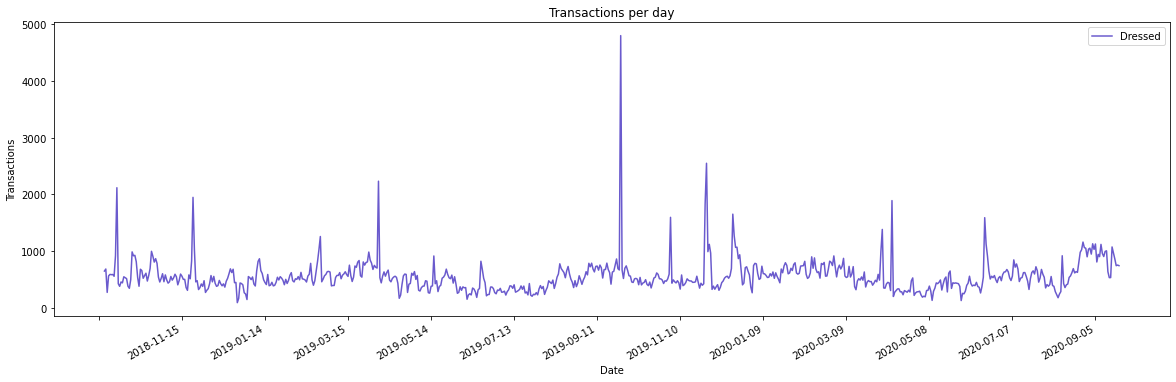

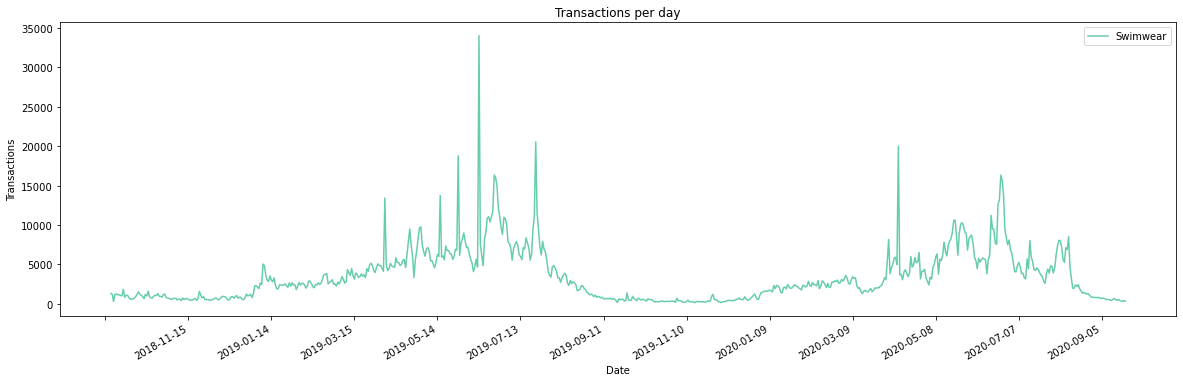

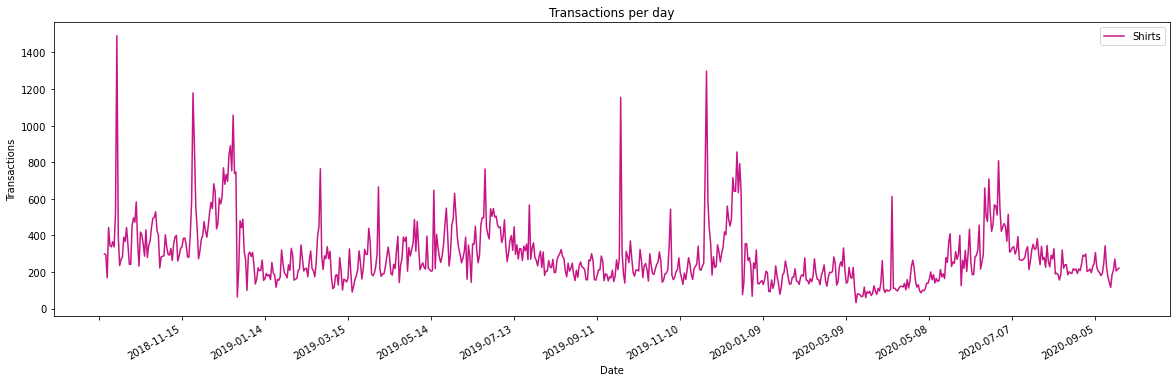

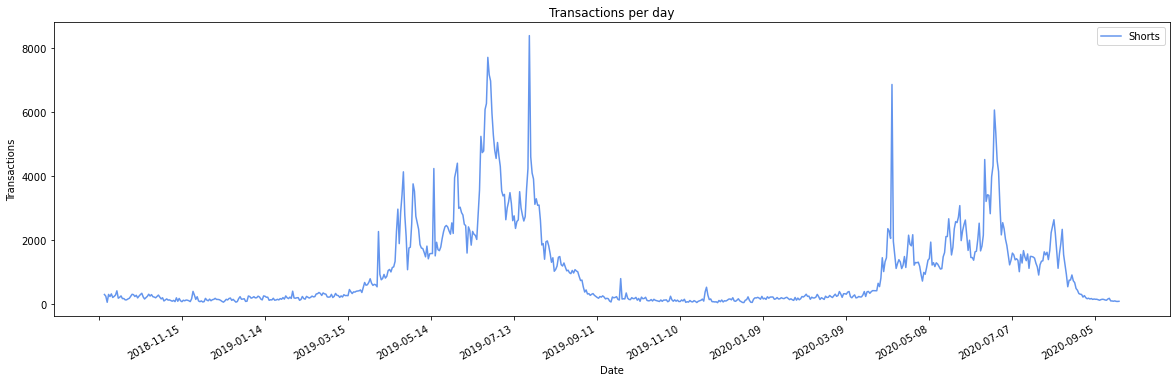

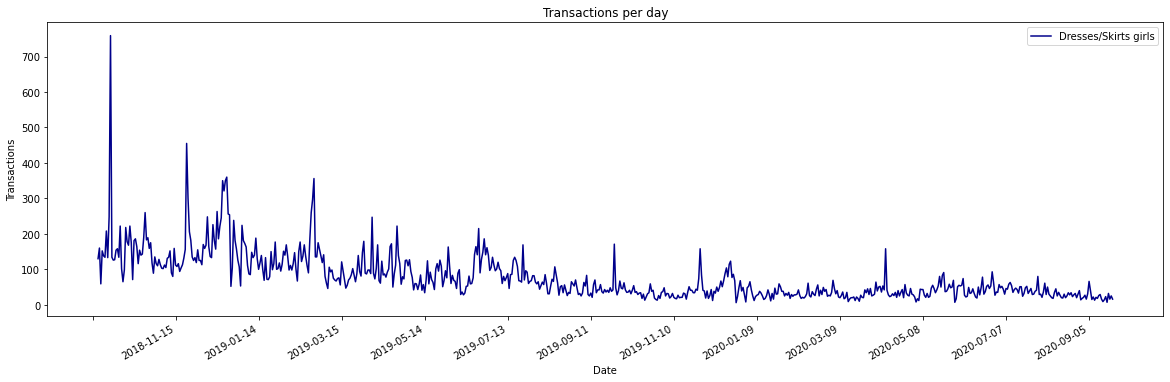

In [52]:
import matplotlib.dates as mdates

df = merged_df.groupby(['t_dat', 'garment_group_name'])['article_id'].count().reset_index()
df.columns = ['Date', 'Garment Group Name', 'Transactions']

for i in ggn:

    fig, ax = plt.subplots(1, 1, figsize=(20,6))
    g1 = ax.plot(df.loc[df['Garment Group Name']==i, 'Date'], df.loc[df['Garment Group Name']==i, 'Transactions'], 
                 label=i, color=cols[ggn.index(i)])
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))
    plt.xlabel('Date')
    plt.ylabel('Transactions')
    ax.legend()
    plt.title('Transactions per day')
    plt.gcf().autofmt_xdate()
    plt.show()

In [ ]:
transactions_index_group_name = (
    transactions.join(articles.set_index('article_id').index_group_name, on='article_id')
)

baby_trans = transactions_index_group_name[transactions_index_group_name.index_group_name == 'Baby/Children']
non_baby_trans = transactions_index_group_name[transactions_index_group_name.index_group_name != 'Baby/Children']

In [ ]:
baby_trans = (
    baby_trans.join(customers.set_index('customer_id').age, on='customer_id')
)

non_baby_trans = (
    non_baby_trans.join(customers.set_index('customer_id').age, on='customer_id')
)

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

sns.kdeplot(data=baby_trans, x='age', ax=ax, color='darkgreen', label='Baby/Children', palette=None)
sns.kdeplot(data=non_baby_trans, x='age', ax=ax, color='darkorange', label='Other', palette=None)

ax.legend()
ax.tick_params(axis='x')
ax.tick_params(axis='y')
plt.setp(ax.get_legend().get_texts())
plt.setp(ax.get_legend().get_title())
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Sales of Baby/Children vs Other articles, by age')
plt.show()

In [5]:
transactions['transaction_id'] = transactions.groupby(['t_dat', 'customer_id']).ngroup()

In [6]:
transactions_garment_group = transactions.merge(articles[['article_id', 'garment_group_name']], on='article_id')

In [7]:
transactions_garment_group.head()

,t_dat,customer_id,article_id,price,sales_channel_id,transaction_id,garment_group_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0,"Under-, Nightwear"
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,2960,"Under-, Nightwear"
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2,4344,"Under-, Nightwear"
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1,5973,"Under-, Nightwear"
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2,7672,"Under-, Nightwear"


In [8]:
ct = pd.crosstab(transactions_garment_group['transaction_id'], transactions_garment_group['garment_group_name'])
ct

garment_group_name,Accessories,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,Outdoor,Shirts,...,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear,Trousers,Trousers Denim,"Under-, Nightwear",Unknown,Woven/Jersey/Knitted mix Baby
transaction_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,3,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,3,13,2,0,0,...,0,4,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9080174,1,0,0,1,0,1,3,1,0,0,...,0,0,0,0,0,0,0,2,0,0
9080175,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9080176,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
ct[ct>1] = 1
freq_table = ct.T.dot(ct)

In [11]:
freq_table

garment_group_name,Accessories,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,Outdoor,Shirts,...,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear,Trousers,Trousers Denim,"Under-, Nightwear",Unknown,Woven/Jersey/Knitted mix Baby
garment_group_name,,,,,,,,,,,,,,,,,,,,,
Accessories,1133712,178673,38611,140716,6465,207515,319976,186573,68007,16879,...,49650,58191,82179,22602,90078,184336,85301,177607,35615,6360
Blouses,178673,1526703,82446,295175,4403,301495,563012,267552,87024,15350,...,110602,120292,58014,43326,116745,397315,157294,210940,69431,3826
Dressed,38611,82446,320294,40678,590,52154,86966,57609,25584,7452,...,8896,21839,12721,7770,14161,103408,27260,39861,9579,614
Dresses Ladies,140716,295175,40678,1265451,4232,253537,437924,164896,60634,10494,...,102132,113249,42286,38538,122619,251487,103778,160446,51992,2978
Dresses/Skirts girls,6465,4403,590,4232,38564,10609,20446,9624,3416,1486,...,1869,1338,4053,980,2701,7917,8185,5253,1495,1056
Jersey Basic,207515,301495,52154,253537,10609,1756152,677746,310552,91349,32649,...,136996,104496,95796,33471,133477,362792,178277,294883,56587,9515
Jersey Fancy,319976,563012,86966,437924,20446,677746,2769622,461154,144639,39220,...,186235,176676,128156,59132,215169,577394,261623,408396,123611,18834
Knitwear,186573,267552,57609,164896,9624,310552,461154,1487886,106144,23724,...,37871,94354,81180,39462,52228,325753,143152,226164,57630,8318
Outdoor,68007,87024,25584,60634,3416,91349,144639,106144,549002,8105,...,13710,26681,22397,12163,20888,102897,51637,61971,23623,2978


In [16]:
np.fill_diagonal(freq_table.values, 0)

In [19]:
freq_table_1000 = freq_table/1000

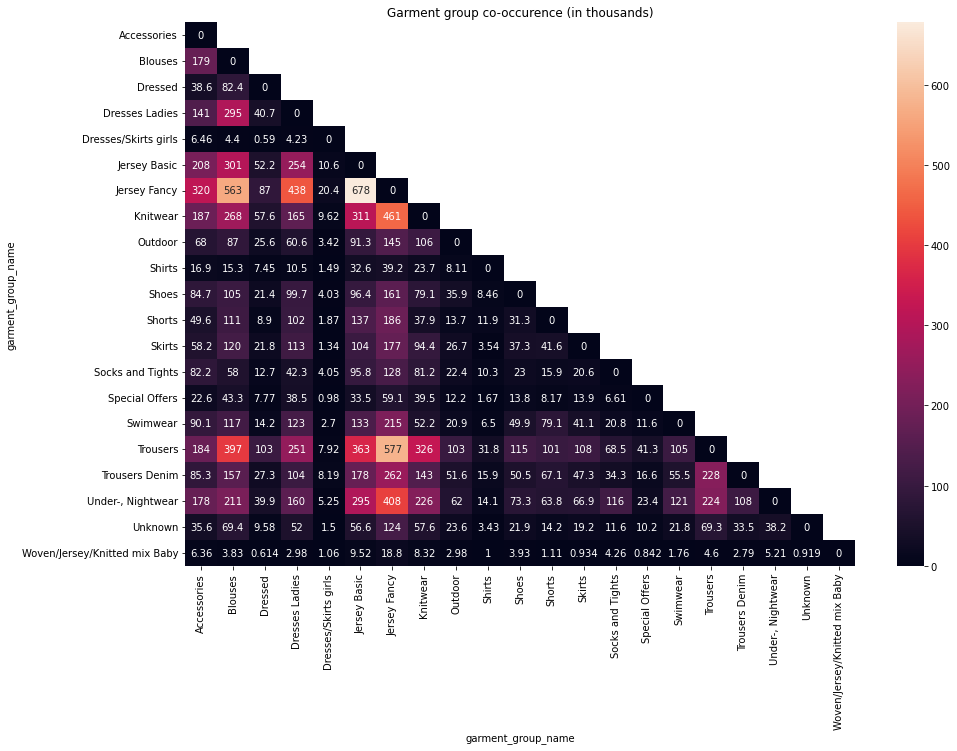

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(freq_table_1000, mask=np.triu(freq_table), annot=True, fmt='.3g')
plt.title('Garment group co-occurence (in thousands)')
plt.show()

In [25]:
freq_table_normalised = freq_table.div(len(transactions), axis=0)

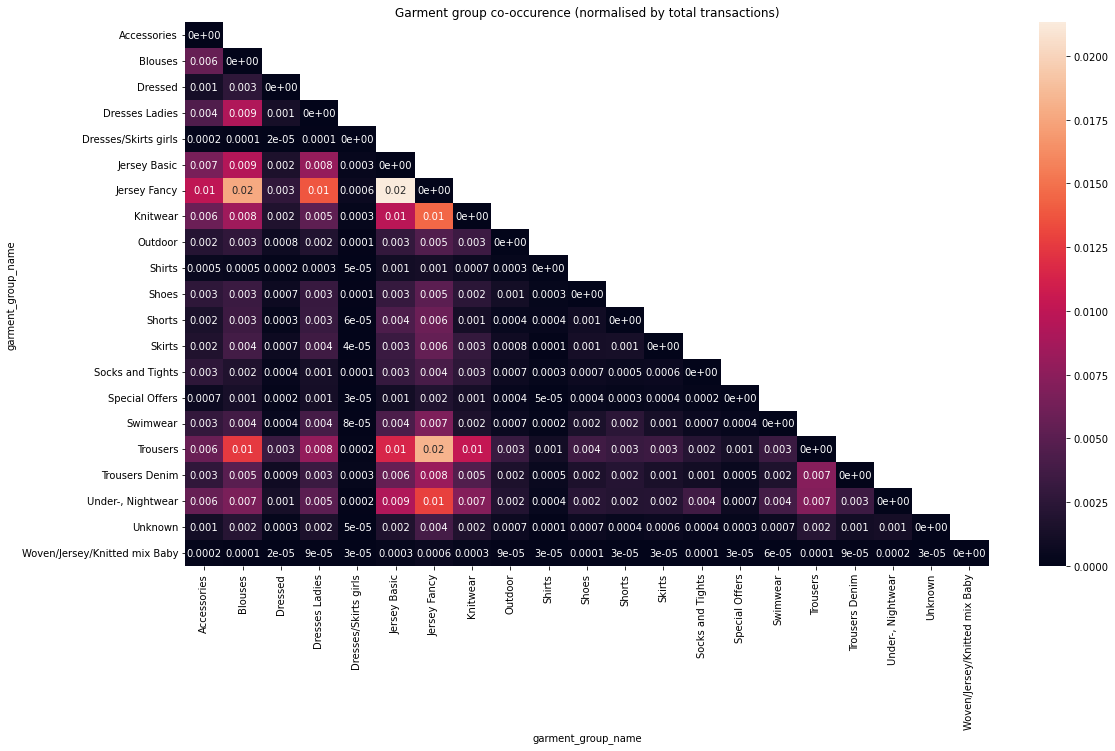

In [29]:
plt.figure(figsize=(18, 10))
sns.heatmap(freq_table_normalised, mask=np.triu(freq_table_normalised), annot=True, fmt='.1')
plt.title('Garment group co-occurence (normalised by total transactions)')
plt.show()

In [30]:
transactions_colour_value = transactions.merge(articles[['article_id', 'perceived_colour_value_name']], on='article_id')

In [31]:
transactions_colour_value.head()

,t_dat,customer_id,article_id,price,sales_channel_id,transaction_id,perceived_colour_value_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0,Dark
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,2960,Dark
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2,4344,Dark
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1,5973,Dark
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2,7672,Dark


In [33]:
ct = pd.crosstab(transactions_colour_value['transaction_id'], transactions_colour_value['perceived_colour_value_name'])
ct[ct>1] = 1
freq_table = ct.T.dot(ct)

In [34]:
freq_table

perceived_colour_value_name,Bright,Dark,Dusty Light,Light,Medium,Medium Dusty,Undefined,Unknown
perceived_colour_value_name,,,,,,,,
Bright,840423,557015,336092,330573,145803,253652,2451,543
Dark,557015,6535251,2112677,1792062,640678,1666531,13436,3618
Dusty Light,336092,2112677,3276496,1150071,389956,1047403,8628,2123
Light,330573,1792062,1150071,2730454,358195,833486,7639,2029
Medium,145803,640678,389956,358195,929268,300214,2994,755
Medium Dusty,253652,1666531,1047403,833486,300214,2489257,6923,1839
Undefined,2451,13436,8628,7639,2994,6923,18904,13
Unknown,543,3618,2123,2029,755,1839,13,4803


In [35]:
np.fill_diagonal(freq_table.values, 0)

In [38]:
freq_table_1000 = freq_table/100000

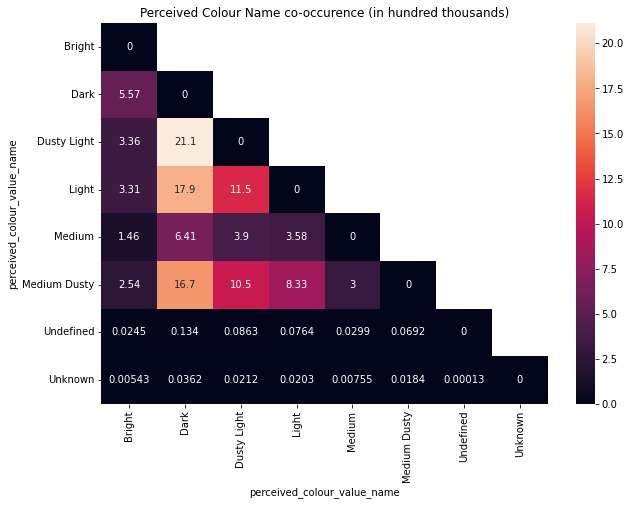

In [40]:
plt.figure(figsize=(10, 7))
sns.heatmap(freq_table_1000, mask=np.triu(freq_table), annot=True, fmt='.3g')
plt.title('Perceived Colour Name co-occurence (in hundred thousands)')
plt.show()

In [53]:
transactions_garment_group_colour_value = transactions.merge(articles[['article_id', 'garment_group_name', 
                                                                       'perceived_colour_value_name']], on='article_id')

In [ ]:
sns.heatmap(pd.crosstab([fin_merged_df.index_group_name], [fin_merged_df.index_group_name]), annot=True)
plt.show()

In [ ]:
sns.heatmap(pd.crosstab([fin_merged_df.perceived_colour_value_name], [fin_merged_df.index_group_name])/100000, 
            annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(pd.crosstab([fin_merged_df.garment_group_name], [fin_merged_df.index_group_name])/100000, 
            annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(pd.crosstab([fin_merged_df.garment_group_name], [fin_merged_df.garment_group_name]), 
            annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(pd.crosstab([fin_merged_df.garment_group_name], [fin_merged_df.perceived_colour_value_name])/100000, 
            annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(pd.crosstab([articles.garment_group_name], [articles.graphical_appearance_name])/100, 
            annot=True)
plt.show()

In [ ]:
plt.figure(figsize = (25,8))
sns.heatmap(pd.crosstab([articles.index_group_name], [articles.section_name])/100, annot=True)
plt.show()